
Installation of required libraries

In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install -U urllib3
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Usi

Load the dataset

In [ ]:
from datasets import load_dataset
dataset= load_dataset("cnn_dailymail", "3.0.0")

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

Access the training split of the loaded dataset

In [ ]:
dataset['train']

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 287113
})

Access and display the first 350 characters of the 'article' from the second example in the training split

In [ ]:
dataset['train'][1]['article'][:350]

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial'

 Access and display the 'highlights' (summary) of the second example in the training split


In [ ]:
dataset['train'][1]['highlights']

'Mentally ill inmates in Miami are housed on the "forgotten floor"\nJudge Steven Leifman says most are there as a result of "avoidable felonies"\nWhile CNN tours facility, patient shouts: "I am the son of the president"\nLeifman says the system is unjust and he\'s fighting for change .'

Initialize a text generation pipeline using the GPT-2 medium model

In [ ]:
from transformers import pipeline
pipe=pipeline("text-generation", model="gpt2-medium")

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

 Extract the first 2000 characters of the article, prepare a prompt for summarization, and generate a summary using the GPT-2 model


In [ ]:
dataset['train'][1]['article'][:2000]
input_text = dataset['train'][1]['article'][:2000]
query = input_text + "\nTL;DR:\n"
pipe_out = pipe(query,max_length=512,clean_up_tokenization_spaces=True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


 Extract and display the generated summary text from the model output, excluding the prompt

In [ ]:
pipe_out[0]['generated_text'][len(query):]

"- You cannot leave the jail until you're ready for trial\n- This is where mentally ill people in Miami-Dade county are housed\n- Mental Illness is the cause of so many arrests that come from jail\n- Leifman says most mentally ill people don't break any laws Go inside Miami's 'aftermath' jail »\n- It takes 2-3 weeks"

Store the generated summary from the GPT-2 model in a dictionary with a key for identification

In [ ]:
summaries={}
summaries['gpt2-medium-380M']= pipe_out[0]['generated_text'][len(query):]

Initialize a summarization pipeline using the T5 base model

In [ ]:
# Try out T5 Transformers
pipe = pipeline('summarization', model='t5-base')

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

 Generate a summary of the input text using the T5 summarization pipeline

In [ ]:
pipe_out = pipe(input_text)

 Store the generated summary from the T5 model in the dictionary with a key for identification

In [ ]:
summaries['t5-base-223M'] = pipe_out[0]['summary_text']

Initialize a summarization pipeline using the BART large model from Facebook and generate a summary of the input text

In [ ]:
 pipe = pipeline('summarization', model='facebook/bart-large-cnn')
 pipe_out = pipe(input_text)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

 Store the generated summary from the BART model in the dictionary with a key for identification

In [ ]:
summaries['bart-large-cnn-400M'] = pipe_out[0]['summary_text']

 Initialize a summarization pipeline using the PEGASUS model trained on the CNN/DailyMail dataset

In [ ]:
pipe = pipeline('summarization', model='google/pegasus-cnn_dailymail')

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

 Generate a summary of the input text using the PEGASUS model

In [ ]:
pipe_out = pipe(input_text)

 Store the generated summary from the PEGASUS model in the dictionary with a key for identification

In [ ]:
summaries['pegasus-cnn-568M'] = pipe_out[0]['summary_text']

Display each model's name in uppercase followed by its generated summary for easy comparison

In [ ]:
for model in summaries:
  print(model.upper())
  print(summaries[model])
  print("")

GPT2-MEDIUM-380M
- You cannot leave the jail until you're ready for trial
- This is where mentally ill people in Miami-Dade county are housed
- Mental Illness is the cause of so many arrests that come from jail
- Leifman says most mentally ill people don't break any laws Go inside Miami's 'aftermath' jail »
- It takes 2-3 weeks

T5-BASE-223M
mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they're ready to appear . a judge says the arrests often result from confrontations with police . mentally ill people often won't do what police say, judge says .

BART-LARGE-CNN-400M
Mentally ill inmates are housed on the "forgotten floor" of Miami-Dade jail. Most often, they face drug charges or charges of assaulting an officer. Judge Steven Leifman says the arrests often result from confrontations with police. He says about one-third of all people in the county jails are mentally 

Import necessary libraries for dataset loading, model pipelines, and text generation with transformers

In [ ]:
from datasets import load_dataset
from transformers import pipeline

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch


Set up the device, load the tokenizer, and initialize the model for sequence-to-sequence tasks using the specified checkpoint


In [ ]:
device='gpu'
model_ckpt='facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Load the SAMSum dataset and display its structure

In [ ]:
samsum=load_dataset('samsum')
samsum

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1491: FutureWarning: The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

Display the first entry from the training set of the SAMSum dataset

In [ ]:
samsum['train'][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

Calculate the number of words in the dialogue and summary for each entry in the training set

In [ ]:

dialogue_len = [len(x['dialogue'].split()) for x in samsum['train']]
summary_len = [len(x['summary'].split()) for x in samsum['train']]

Create a DataFrame for dialogue and summary lengths and plot histograms to visualize their distributions

array([[<Axes: title={'center': 'Dialogue Length'}>,
        <Axes: title={'center': 'Summary length'}>]], dtype=object)

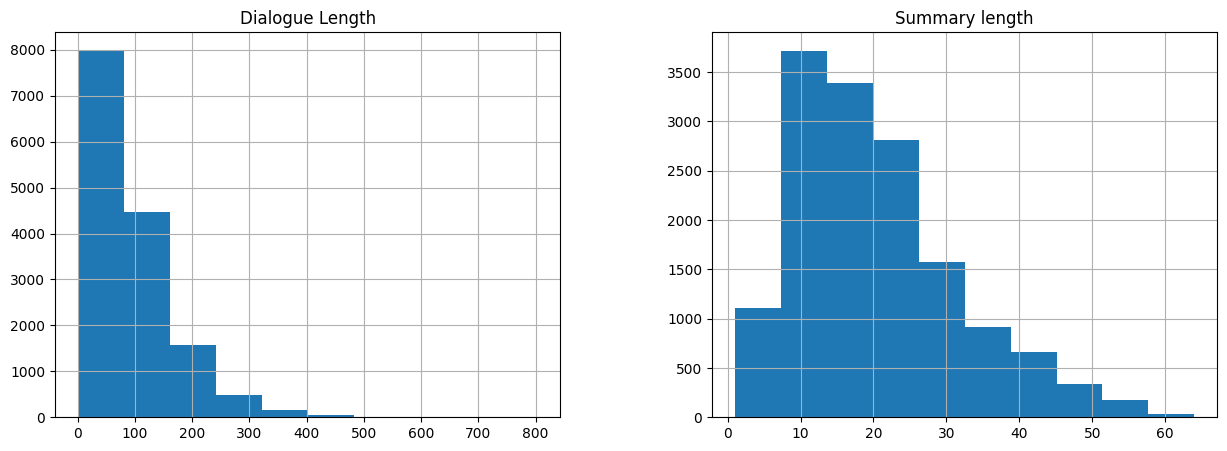

In [ ]:
import pandas as pd
data=pd.DataFrame([dialogue_len,summary_len]).T
data.columns = ['Dialogue Length','Summary length']

data.hist(figsize=(15,5))

Define a function to tokenize and prepare input and label tensors for the model

In [ ]:

# lets build Data Collator

def get_feature(batch):
  encodings = tokenizer(batch['dialogue'], text_target=batch['summary'],
                        max_length=1024, truncation=True)

  encodings = {'input_ids': encodings['input_ids'],
               'attention_mask': encodings['attention_mask'],
               'labels': encodings['labels']}

  return encodings

 Apply the get_feature function to the SAMSum dataset, processing it in batches

In [ ]:
samsum_pt = samsum.map(get_feature, batched=True)


Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

 Display the processed SAMSum dataset with features added

In [ ]:
samsum_pt

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

Set the format of the SAMSum dataset to PyTorch tensors for specified columns

In [ ]:

columns = ['input_ids', 'labels', 'attention_mask']
samsum_pt.set_format(type='torch', columns=columns)

 Initialize a data collator for sequence-to-sequence tasks, using the tokenizer and model

In [ ]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

Set up training arguments and initialize the Trainer for model fine-tuning with specified configurations

In [ ]:
from transformers import TrainingArguments,Trainer
training_args = TrainingArguments(
    output_dir = 'bart_samsum',
    num_train_epochs=1,
    warmup_steps = 500,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay = 0.01,
    logging_steps = 10,
    evaluation_strategy = 'steps',
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulation_steps=16
)
trainer = Trainer(model=model, args=training_args, tokenizer=tokenizer, data_collator=data_collator,
                  train_dataset = samsum_pt['train'], eval_dataset = samsum_pt['validation'])

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Start the training process using the Trainer with the specified configurations and datasets

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:646: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss,Validation Loss


TrainOutput(global_step=230, training_loss=1.483706296008566, metrics={'train_runtime': 1778.9525, 'train_samples_per_second': 8.281, 'train_steps_per_second': 0.129, 'total_flos': 8823027777404928.0, 'train_loss': 1.483706296008566, 'epoch': 0.9991854466467553})

Save the trained model to the specified directory

In [ ]:
trainer.save_model('Coderone_2ndProject')

NameError: name 'trainer' is not defined

 Load the saved model for summarization and generate a summary for the custom dialogue using specified generation parameters

In [ ]:
# custome Dialogue Prediction

pipe = pipeline('summarization', model='Coderone_2ndProject')
gen_kwargs = {'length_penalty': 0.8, 'num_beams': 8, "max_length": 128}

custom_dialogue="""
John was always impatient on the weekends; he missed the formal structure of the business week. When he was younger he used to stay late after school on Fridays and come in early on Mondays, a pattern his mother referred to with equal parts admiration and disdain as “studying overtime.”
"""
print(pipe(custom_dialogue, **gen_kwargs))

NameError: name 'pipeline' is not defined